#### **1. Importing Required Package and Modules**

Installation of the necessary modules.

In [ ]:
%pip install seaborn
%pip install scikit-learn
%pip install matplotlib
%pip install aisp

In [2]:
# Importing the negative selection.
from aisp.NSA import RNSA

# Importing other packages. 
import numpy as np
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

#### 2. Generating dice bubbles for classes randomly.

Using the make_blobs function, two sets of data are generated in the form of bubbles, in the range between 0 and 1, representing each class x and y. Then this data is separated into test and training sets.

In [ ]:
# Generating the samples and outputs for the training.
samples, output = make_blobs(n_samples=500 , n_features=2, cluster_std=0.07, center_box=([0.0, 1.0]), centers=[[0.25, 0.75], [0.75, 0.25]], random_state=1234) 
# Separating data for training and testing.
train_x, test_x, train_y, test_y = train_test_split(samples, output, test_size=0.2)

#### 3. Testing the model ``default-NSA``:
Start the model with 500 detectors, each with a radius of 0.06. Then, it presents the result of the forecast accuracy.

In [3]:
# Starting the class.
nsa = RNSA(N=500, r=0.06, seed=123)
# Carrying out the training:
nsa.fit(X=train_x, y=train_y)
# Previewing classes with test samples.
prev_y = nsa.predict(test_x)
# Showing the accuracy of predictions for actual data.
print(f"The accuracy is {accuracy_score(prev_y, test_y)}")
print(classification_report(test_y, prev_y))

✔ Non-self detectors for classes (0, 1) successfully generated:  ┇██████████┇ 1000/1000 detectors


The accuracy is 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00        45

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



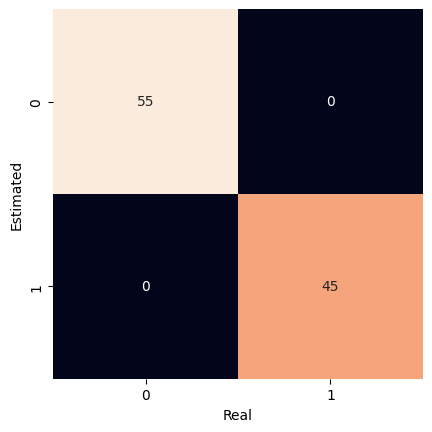

In [4]:
# Generating the confusion matrix and plotting it graphically.
mat = confusion_matrix(y_true=test_y, y_pred=prev_y)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=nsa.classes, yticklabels=nsa.classes)
plt.xlabel('Real')
plt.ylabel('Estimated')
plt.show()

#### 4. Detector and sample plotting:

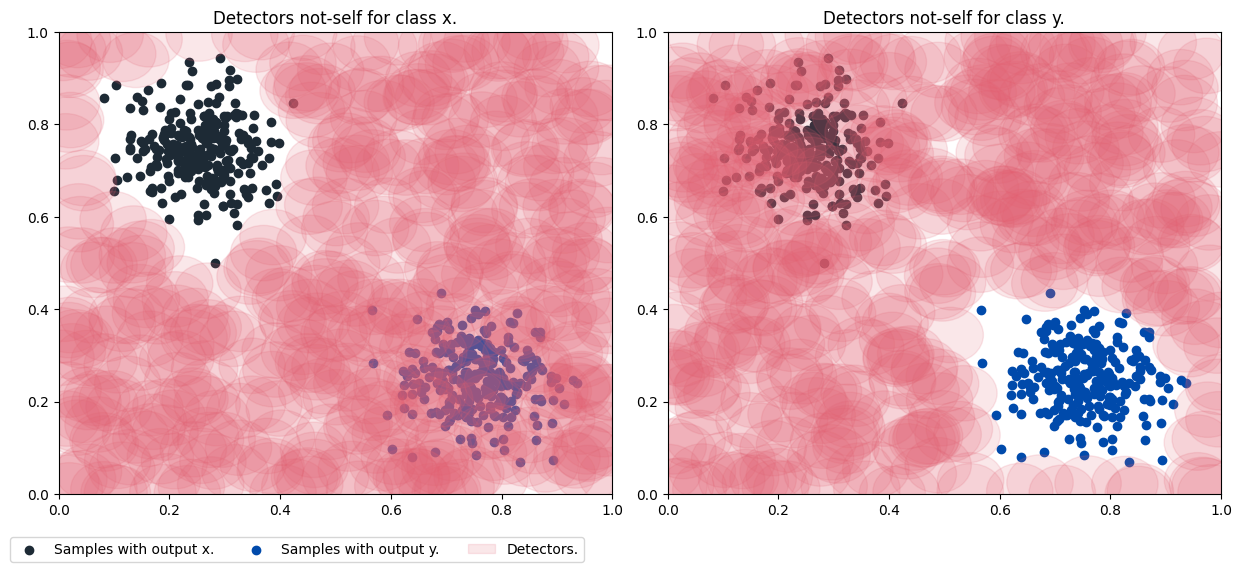

In [5]:
def plot_detectores(samples, train_x, nsa, rs):
    fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(15, 6))
    plt.subplots_adjust(wspace=0.1, hspace=0.01, )
    labels = ['x', 'y']
    classesIndex = np.array((np.where(output == 0)[0] ,np.where(output == 1)[0]))
    
    for i in range(2):

        ax[i].axis([0, 1,0,1])
        ax[i].scatter(samples[classesIndex[0], 0], samples[classesIndex[0], 1], label='Samples with output x', color='#1d2a35')
        ax[i].scatter(samples[classesIndex[1], 0], samples[classesIndex[1], 1], label='Samples with output y', color='#004aab')
        ax[i].set_title(f'Detectors not-self for class {labels[i]}.')
        for k in range(len(nsa.detectors[i])):
            r = nsa.detectors[i][k][1] if len(nsa.detectors[i][k][:]) > 1 else nsa.r
            ax[i].add_patch(plt.Circle((nsa.detectors[i][k][0][0], nsa.detectors[i][k][0][1]), color='#e25f71', radius=(r), alpha=0.15, label='Detectors'))
    
        if rs > 0 and train_x is not None:
            for sample in samples[classesIndex[i]]:
                ax[i].add_patch(plt.Circle((sample[0], sample[1]), color='#04aa6d', radius=(rs), alpha=0.05, label='Samples radius.'))
    if rs > 0:
        legend = fig.legend(['Samples with output x.', 'Samples with output y.', 'Detectors.', 'Samples radius.'], bbox_to_anchor=(0.48, 0.05), ncol=2)
        handles = legend.legendHandles
        handles[3].set_color('#04aa6d')
    else:
        fig.legend(['Samples with output x.', 'Samples with output y.', 'Detectors.'], bbox_to_anchor=(0.48, 0.05), ncol=3)
    
    plt.show()

plot_detectores(samples, None, nsa, 0)

#### 5. Testing the model ``V-detector``:
Start the model with 50 detectors, where the minimum radius is 0.05 and the sample's own radius is 0.04. It then shows the forecast accuracy result.

In [6]:
# Starting the class.
nsa = RNSA(N=20, r=0.02, algorithm='V-detector', r_s=0.04, seed=123)
# Carrying out the training:
nsa.fit(X=train_x, y=train_y)
# Previewing classes with test samples.
prev_y = nsa.predict(test_x)
# Showing the accuracy of predictions for actual data.
print(f"The accuracy is {accuracy_score(prev_y, test_y)}")
print(classification_report(test_y, prev_y))

✔ Non-self detectors for classes (0, 1) successfully generated:  ┇██████████┇ 40/40 detectors

The accuracy is 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00        45

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



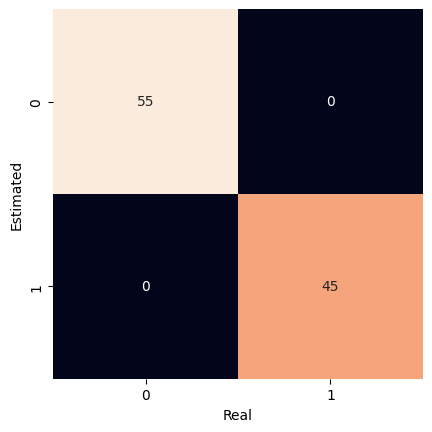

In [7]:
# Generating the confusion matrix and plotting it graphically.
mat = confusion_matrix(y_true=test_y, y_pred=prev_y)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=nsa.classes, yticklabels=nsa.classes)
plt.xlabel('Real')
plt.ylabel('Estimated')
plt.show()

#### 6. Detector and sample plotting:

C:\Users\jpsil\AppData\Local\Temp\ipykernel_5048\2398553607.py:22: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  handles = legend.legendHandles


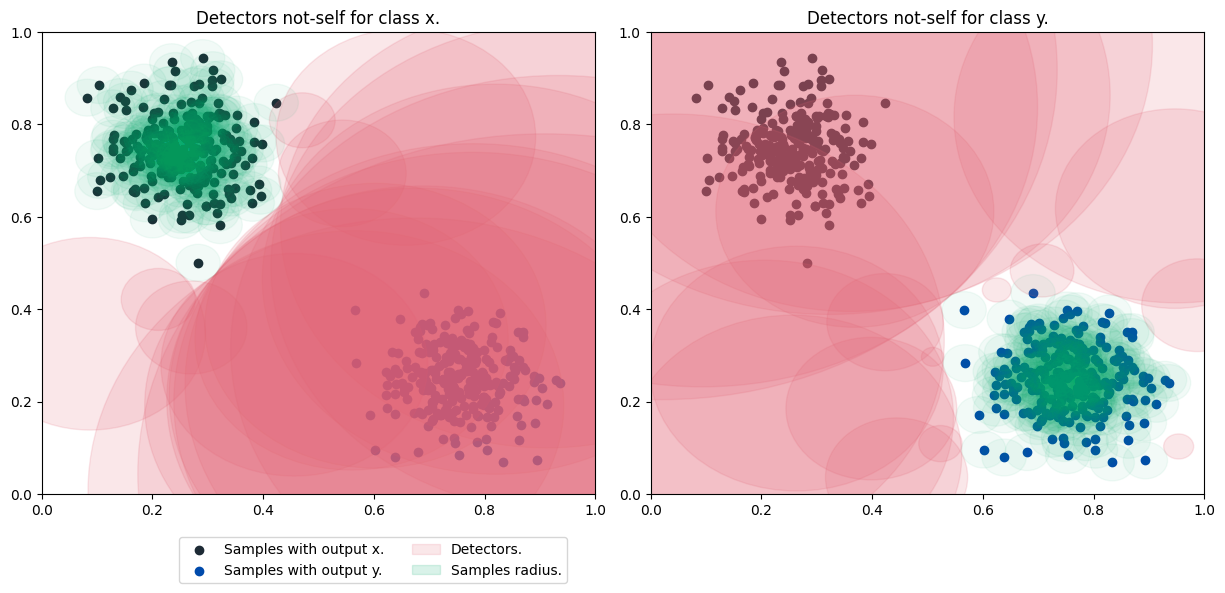

In [8]:
plot_detectores(samples, train_x, nsa, 0.04)